# K-Nearest neighbors Algorithm

**Importing the Libraries**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")

### K-Nearest neighbors Algorithm

This algorithm is known as KNN, short for K Nearest Neighbors.

Calculated as a result of performing a distance measurement by comparing data of an unknown class with other data in the training set.

It is expressed as the data classification that has yet to be assigned to a class according to the distance by setting it to the most ideal or optimal class.

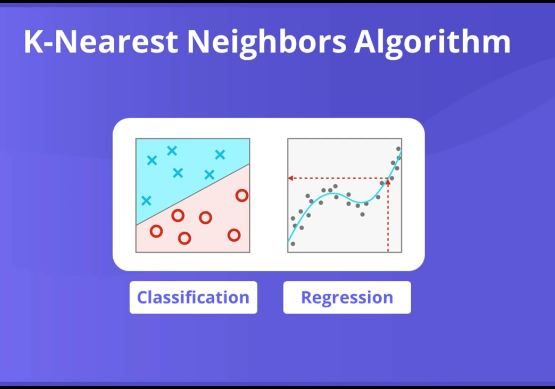

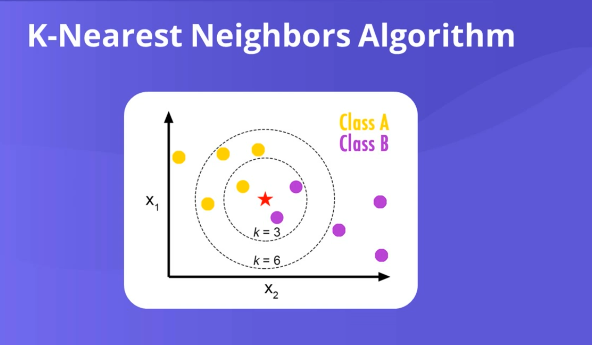

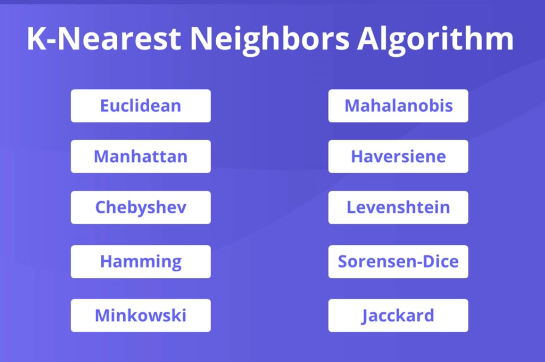

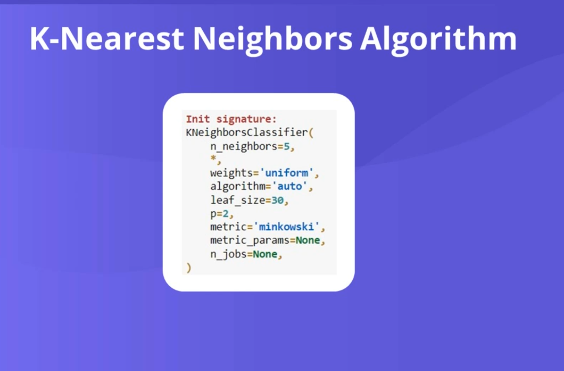

# KNN Advantages

Data training operations are most accessible than any other algorithms.

Processes and analyzes can be followed analytically/numerically.

Effective against complex or complex(noisy) training data.

Easy to implement.

Training can be performed using small number of parameters.

# KNN disadvantages

Because the transaction volume and steps are high, it needs some pretty high performing hardware, so the cost of the model that we will create is also pretty high.

Although it is resistant to high-volume data, it takes a lot of time because the number of steps and transactions is obviuosly high.

Finding the algorithm takes a long time in certain periods.



**Loading the Dataset**

In [2]:
df = pd.read_csv("teleCust.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


**Getting to know the dataset**

In [3]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("------------------")

region
3    344
2    334
1    322
Name: region, dtype: int64
------------------
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: tenure, Length: 72, dtype: int64
------------------
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: age, dtype: int64
------------------
marital
0    505
1    495
Name: marital, dtype: int64
------------------
address
1     68
2     66
4     61
3     61
0     56
7     53
5     50
9     41
8     39
10    3

In [4]:
df.drop(["ed", "employ"], axis = 1, inplace = True)

In [5]:
df.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   retire   1000 non-null   float64
 7   gender   1000 non-null   int64  
 8   reside   1000 non-null   int64  
 9   custcat  1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


**EDA**

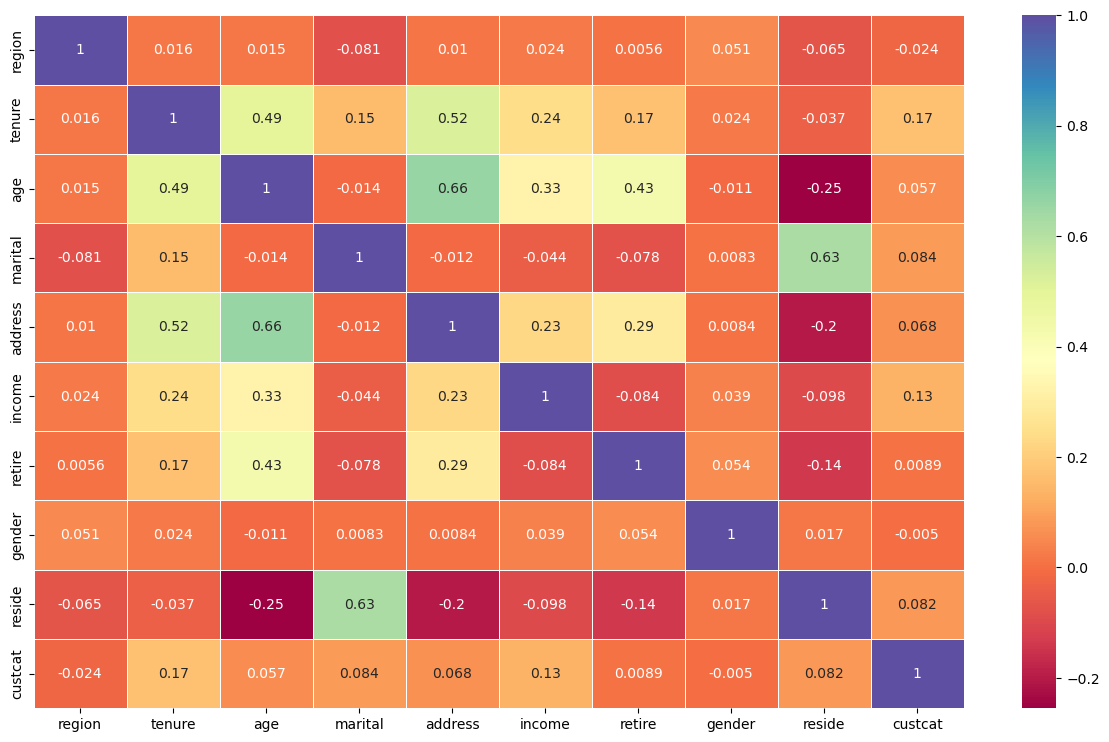

In [7]:
plt.figure(figsize = (15, 9))
sns.heatmap(df.corr(), annot = True, linewidth = 0.5, cmap = "Spectral")
plt.show()

In [8]:
df.drop(["retire", "gender"], axis = 1, inplace = True)

In [9]:
df.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


In [10]:
region = pd.get_dummies(df['region'],drop_first=True, prefix = "region")
reside = pd.get_dummies(df['reside'],drop_first=True, prefix = "reside")

In [11]:
df.drop(['region','reside'],axis=1,inplace=True)

In [12]:
df = pd.concat([df, region, reside], axis=1)

In [13]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,1,0,1,0,0,0,0,0,0
1,11,33,1,7,136.0,4,0,1,0,0,0,0,1,0,0
2,68,52,1,24,116.0,3,0,1,1,0,0,0,0,0,0
3,33,33,0,12,33.0,1,1,0,0,0,0,0,0,0,0
4,23,30,1,9,30.0,3,1,0,0,0,1,0,0,0,0


**Standardization of variables**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaled_variable = df[['tenure','age', 'address', 'income']]

In [16]:
scaled_variable

,tenure,age,address,income
0,13,44,9,64.0
1,11,33,7,136.0
2,68,52,24,116.0
3,33,33,12,33.0
4,23,30,9,30.0
...,...,...,...,...
995,10,39,0,27.0
996,7,34,2,22.0
997,67,59,40,944.0
998,70,49,18,87.0


In [17]:
scaler = StandardScaler()

In [18]:
# Example with code StandardScaler()
#from sklearn.preprocessing import StandardScaler
#import numpy as np

# 4 samples/observations and 2 variables/features
data = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print(data)

print(scaled_data)

[[0 0]
 [1 0]
 [0 1]
 [1 1]]
[[-1. -1.]
 [ 1. -1.]
 [-1.  1.]
 [ 1.  1.]]


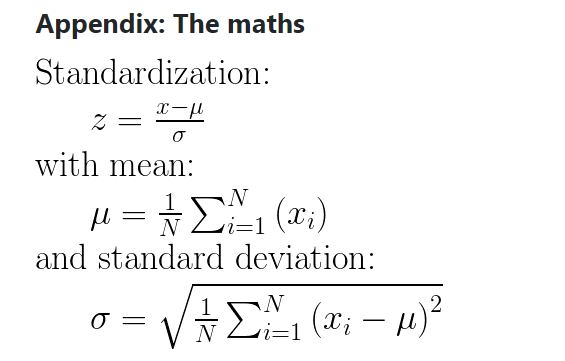

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).

Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [19]:
import numpy as np
data = [[6, 2], [4, 2], [6, 4], [8, 2]]
a = np.array(data)
#print(a)

np.std(a, axis=0)
#print(np.std(a, axis=0))
#array([1.41421356, 0.8660254 ])

np.mean(a, axis=0)
#print(np.mean(a, axis=0))
#array([6. , 2.5])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
print(scaler.mean_)

#Xchanged = (X−μ)/σ  WHERE σ is Standard Deviation and μ is mean
z=scaler.transform(data)
z

[6.  2.5]


array([[ 0.        , -0.57735027],
       [-1.41421356, -0.57735027],
       [ 0.        ,  1.73205081],
       [ 1.41421356, -0.57735027]])

In [20]:
np.mean(z, axis =0)

array([ 0.00000000e+00, -2.77555756e-17])

In [21]:
np.std(z, axis = 0)

array([1., 1.])

In [22]:
scaler.fit(scaled_variable)

StandardScaler()

In [23]:
scaled_variable = scaler.transform(scaled_variable)

In [24]:
scaled_variable

array([[-1.055125  ,  0.18450456, -0.25303431, -0.12650641],
       [-1.14880563, -0.69181243, -0.4514148 ,  0.54644972],
       [ 1.52109247,  0.82182601,  1.23481934,  0.35951747],
       ...,
       [ 1.47425216,  1.37948227,  2.82186323,  8.09851297],
       [ 1.61477311,  0.58283046,  0.63967788,  0.08846569],
       [ 0.67796676, -0.45281689, -0.4514148 , -0.36017173]])

In [25]:
df_scaled = pd.DataFrame(scaled_variable, columns = ['tenure','age', 'address', 'income']) 

In [26]:
df_scaled.head()

,tenure,age,address,income
0,-1.055125,0.184505,-0.253034,-0.126506
1,-1.148806,-0.691812,-0.451415,0.546450
2,1.521092,0.821826,1.234819,0.359517
3,-0.118319,-0.691812,0.044536,-0.416251
4,-0.586722,-0.930808,-0.253034,-0.444291


In [27]:
df.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,1,0,1,0,0,0,0,0,0
1,11,33,1,7,136.0,4,0,1,0,0,0,0,1,0,0
2,68,52,1,24,116.0,3,0,1,1,0,0,0,0,0,0
3,33,33,0,12,33.0,1,1,0,0,0,0,0,0,0,0
4,23,30,1,9,30.0,3,1,0,0,0,1,0,0,0,0


In [28]:
df.drop(['tenure','age', 'address', 'income'], axis = 1, inplace = True)

In [29]:
df = pd.concat([df, df_scaled], axis=1)

In [30]:
df.head()

,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income
0,1,1,1,0,1,0,0,0,0,0,0,-1.055125,0.184505,-0.253034,-0.126506
1,1,4,0,1,0,0,0,0,1,0,0,-1.148806,-0.691812,-0.451415,0.546450
2,1,3,0,1,1,0,0,0,0,0,0,1.521092,0.821826,1.234819,0.359517
3,0,1,1,0,0,0,0,0,0,0,0,-0.118319,-0.691812,0.044536,-0.416251
4,1,3,1,0,0,0,1,0,0,0,0,-0.586722,-0.930808,-0.253034,-0.444291


**KNN modelling**

In [31]:
X = df.drop(["custcat"], axis = 1)
y = df["custcat"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [33]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 14) (800,)
Test set: (200, 14) (200,)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k = 4
knn_model = KNeighborsClassifier(n_neighbors = k)
knn_model.fit(X_train,y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [36]:
y_pred = knn_model.predict(X_test)

In [37]:
from sklearn import metrics
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.325


In [38]:
k = 6
knn_model2 = KNeighborsClassifier(n_neighbors = k)
knn_model2.fit(X_train,y_train)
knn_model2

KNeighborsClassifier(n_neighbors=6)

In [39]:
y_pred = knn_model2.predict(X_test)

In [40]:
print("Accuracy Score:", metrics.accuracy_score(y_test, y_pred))

Accuracy Score: 0.335
